In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [40]:
dataframe= pd.read_csv("kc_house_data.csv")
dataframe.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [41]:
dataframe.shape

dataframe.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [42]:
dataframe["date"]

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [43]:
dataframe['date'] = pd.to_datetime(dataframe['date']).dt.year
dataframe['date']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: date, Length: 21613, dtype: int64

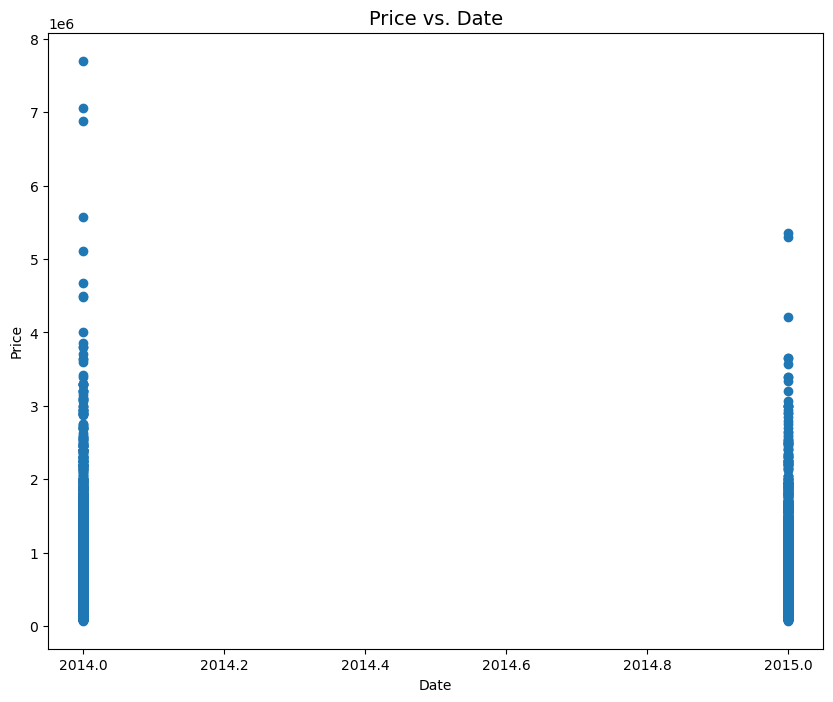

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(dataframe["date"], dataframe["price"])
plt.title("Price vs. Date", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [45]:
dataframe.drop(["id", "date"], inplace=True, axis=1)
dataframe.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [46]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [47]:
dataframe.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [48]:
dataframe.duplicated().sum()

5

In [49]:
dataframe.drop_duplicates(inplace=True)
corelation=dataframe.corr()
corelation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308326,0.525146,0.702035,0.089652,0.256893,0.266371,0.397409,0.036345,0.667541,0.605559,0.323839,0.054062,0.126489,-0.053179,0.307002,0.021587,0.585378,0.082435
bedrooms,0.308326,1.000000,0.515956,0.576640,0.031671,0.175608,-0.006591,0.079411,0.028370,0.357143,0.477569,0.303093,0.154410,0.018678,-0.152683,-0.008970,0.129395,0.391571,0.029197
bathrooms,0.525146,0.515956,1.000000,0.754717,0.087751,0.500754,0.063747,0.187892,-0.124941,0.665029,0.685376,0.283824,0.506038,0.050880,-0.203837,0.024587,0.223065,0.568692,0.087192
sqft_living,0.702035,0.576640,0.754717,1.000000,0.172809,0.354181,0.103817,0.284627,-0.058825,0.762893,0.876593,0.435061,0.318253,0.055299,-0.199396,0.052514,0.240150,0.756398,0.183258
sqft_lot,0.089652,0.031671,0.087751,0.172809,1.000000,-0.005113,0.021598,0.074744,-0.008988,0.113688,0.183508,0.015263,0.053154,0.007671,-0.129595,-0.085683,0.229530,0.144596,0.718552
floors,0.256893,0.175608,0.500754,0.354181,-0.005113,1.000000,0.023731,0.029383,-0.263728,0.458074,0.524117,-0.245646,0.489244,0.006193,-0.059153,0.049595,0.125592,0.280080,-0.011180
waterfront,0.266371,-0.006591,0.063747,0.103817,0.021598,0.023731,1.000000,0.401992,0.016648,0.082799,0.072076,0.080584,-0.026150,0.092949,0.030283,-0.014272,-0.041916,0.086466,0.030698
view,0.397409,0.079411,0.187892,0.284627,0.074744,0.029383,0.401992,1.000000,0.045819,0.251426,0.167642,0.276993,-0.053196,0.103203,0.084857,0.006047,-0.078598,0.280391,0.072566
condition,0.036345,0.028370,-0.124941,-0.058825,-0.008988,-0.263728,0.016648,0.045819,1.000000,-0.144599,-0.158273,0.174061,-0.361306,-0.060875,0.002998,-0.014975,-0.106590,-0.092920,-0.003449
grade,0.667541,0.357143,0.665029,0.762893,0.113688,0.458074,0.082799,0.251426,-0.144599,1.000000,0.756090,0.168483,0.446887,0.014396,-0.184875,0.114100,0.198496,0.713396,0.119319


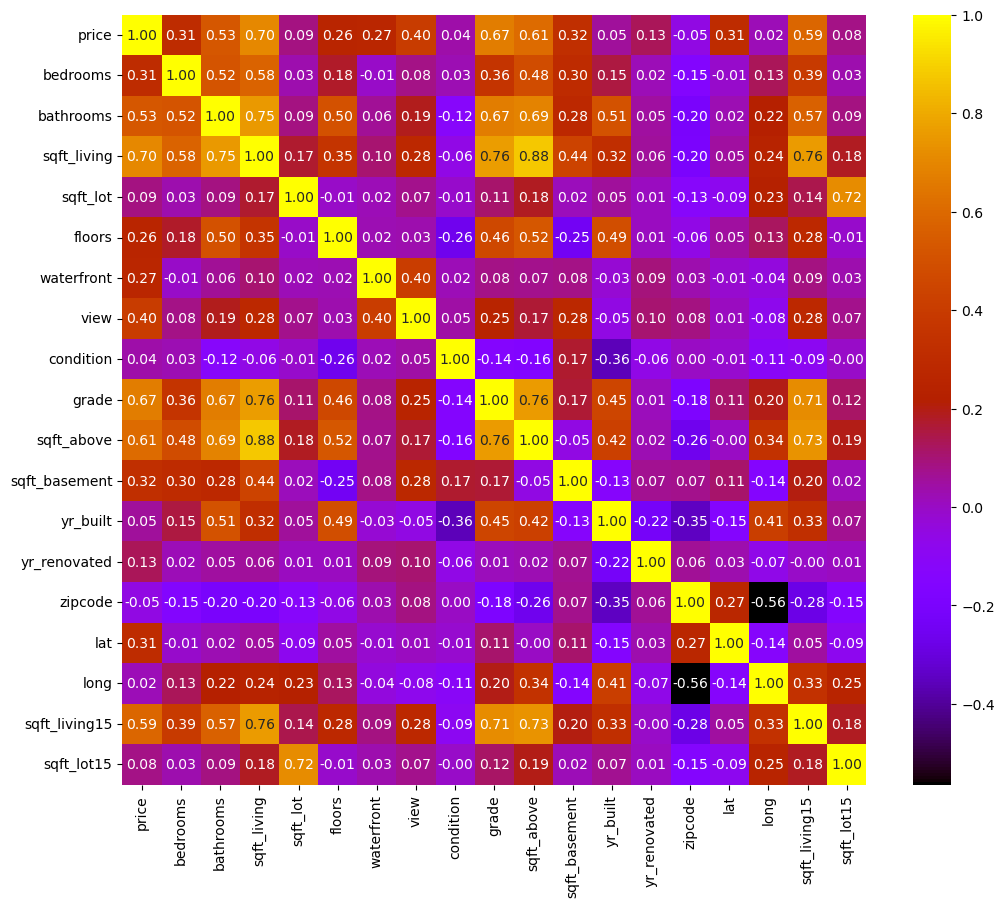

In [50]:
plt.figure(figsize=(12,10))
sns.heatmap(corelation, annot=True, fmt='.2f', cmap='gnuplot')
plt.show()

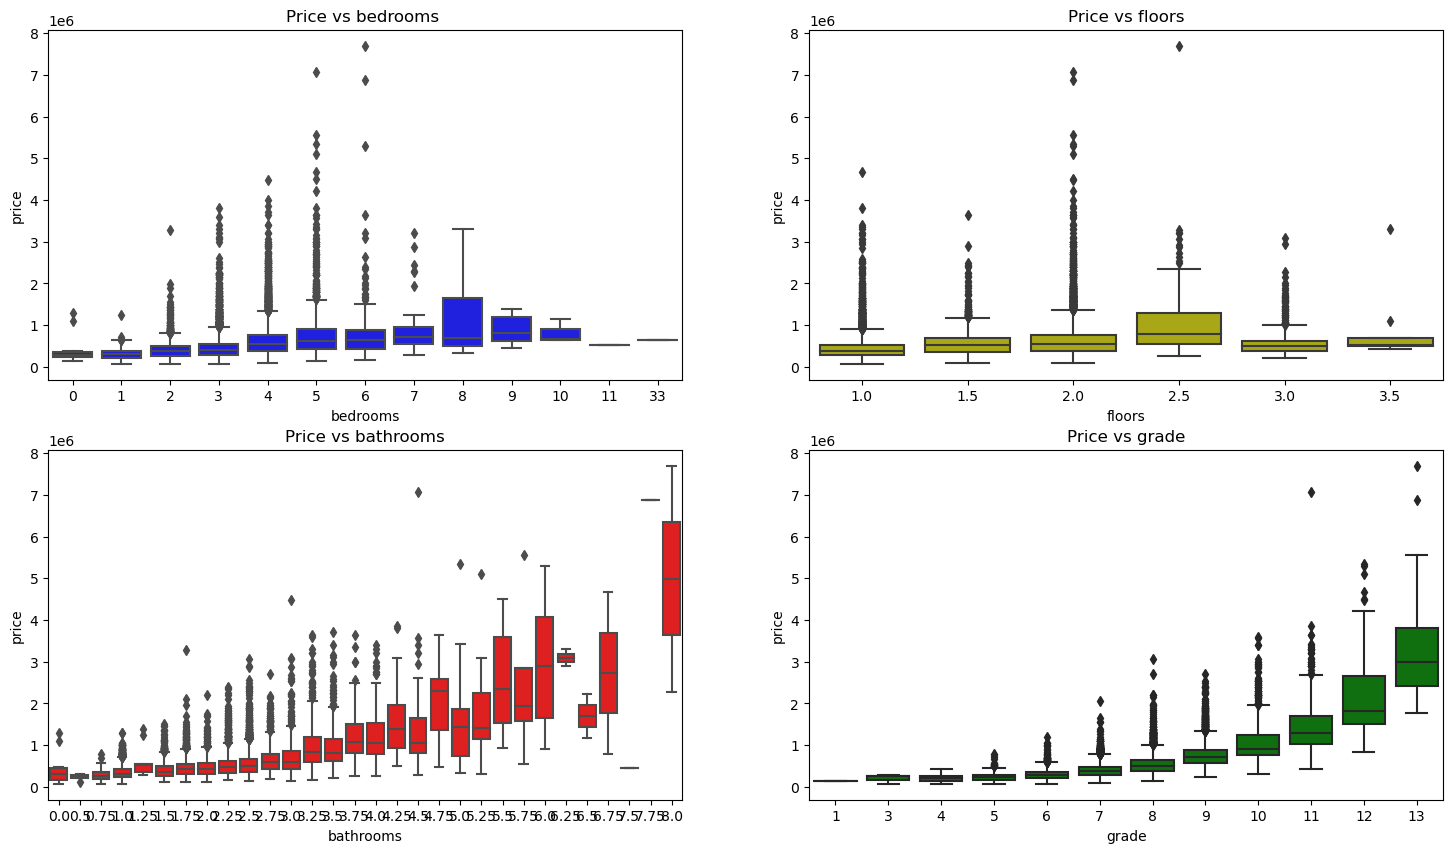

In [51]:

fig= plt.figure(figsize=(18,10))

ax=fig.add_subplot(2,2,1)
sns.boxplot(data=dataframe, x=dataframe["bedrooms"], y=dataframe["price"], hue=None, color='b', ax=ax)
ax.set_title("Price vs bedrooms ")

ax=fig.add_subplot(2,2,2)
sns.boxplot(data=dataframe, x=dataframe["floors"], y=dataframe["price"], hue=None, color='y', ax=ax)
ax.set_title("Price vs floors")

ax=fig.add_subplot(2,2,3)
sns.boxplot(data=dataframe, x=dataframe["bathrooms"], y=dataframe["price"], hue=None, color='r', ax=ax)
ax.set_title("Price vs bathrooms")


ax=fig.add_subplot(2,2,4)
sns.boxplot(data=dataframe, x=dataframe["grade"], y=dataframe["price"], hue=None, color='g', ax=ax)
ax.set_title("Price vs grade")

plt.show()

In [52]:
x_train,x_test,y_train,y_test= train_test_split(dataframe.drop("price", axis=1),
                                                dataframe["price"],
                                                test_size=0.2,
                                                random_state=42)

x_train.shape,x_test.shape,y_train.shape, y_test.shape

((17286, 18), (4322, 18), (17286,), (4322,))

In [55]:
std= StandardScaler()

x_train= std.fit_transform(x_train)  

x_test=std.transform(x_test)

In [56]:
model_parameters= {"RandomForestregressor":  [RandomForestRegressor(), {'n_estimators':[100,200], 'max_depth':[6,8],'min_samples_split':[2,4],'criterion':['squared_error']}]}

In [57]:
result={}

for key, value in model_parameters.items():
    regressor= GridSearchCV(value[0], value[1], cv=2, scoring="r2", n_jobs=-1).fit(x_train, y_train)
    regressor.best_params_
    y_pred=regressor.predict(x_test)
    mse=mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    result[key] =rmse 

In [58]:
print(result)

{'RandomForestregressor': 149531.29862978082}


In [59]:
columns=dataframe.columns.to_list()
outliers=[]

for col in columns:
    #print(col)
    mean=np.mean(dataframe[col])
    std=np.std(dataframe[col])
    for i in range(len(dataframe)):
        item = dataframe[col].iloc[i]
        z_score=(item-mean)/std
        if np.abs(z_score)>3:
            outliers.append(i)

outliers = set(outliers)
outliers = list(outliers)

In [60]:
ratio= len(outliers)/len(dataframe)
ratio

0.13467234357645316

In [61]:
dataframe.drop(dataframe.index[outliers],inplace=True)
dataframe.shape

(18698, 19)

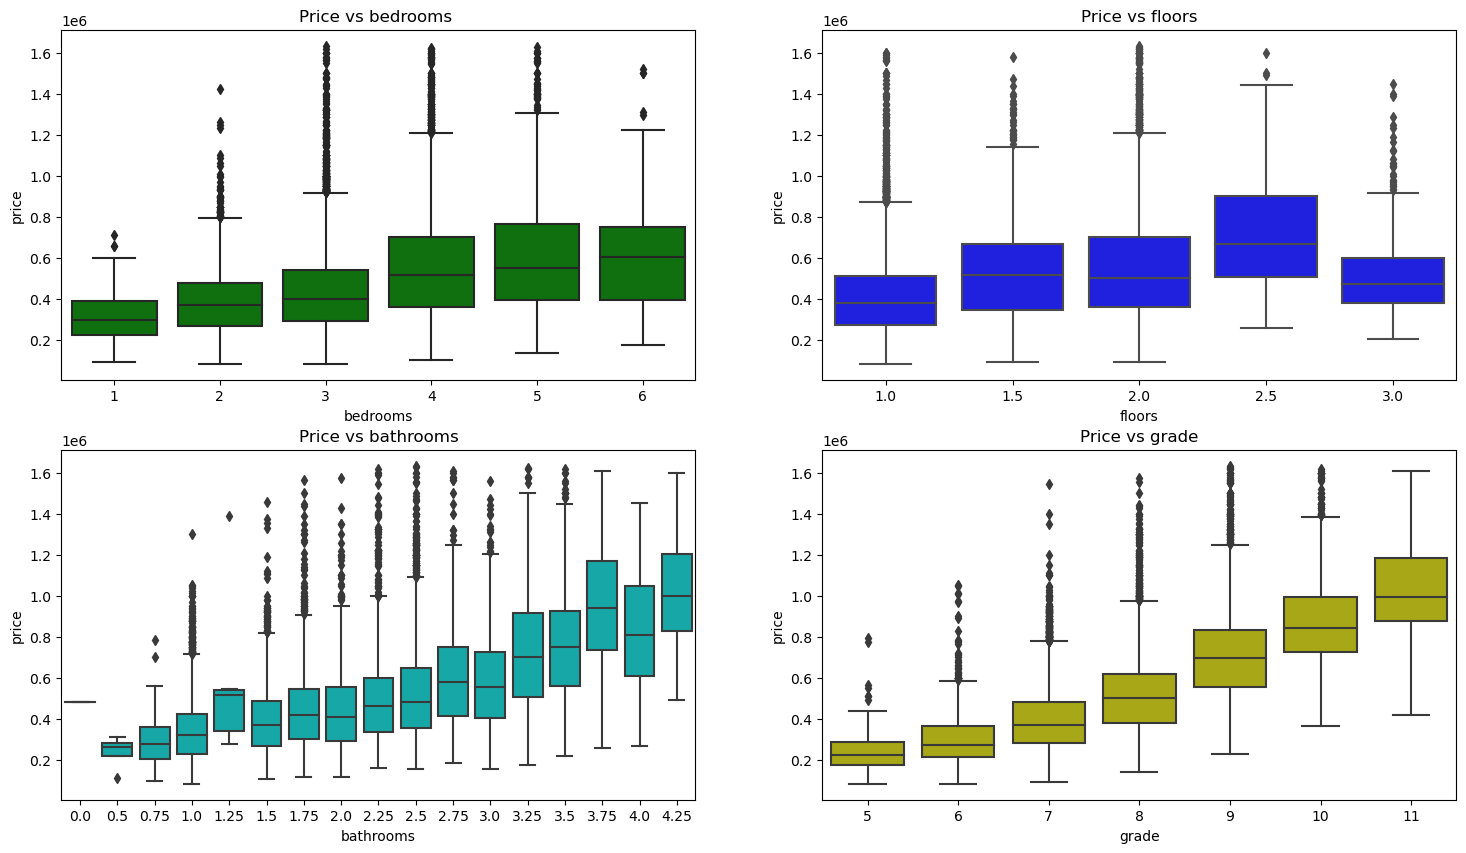

In [62]:
fig= plt.figure(figsize=(18,10))

ax=fig.add_subplot(2,2,1)
sns.boxplot(data=dataframe, x=dataframe["bedrooms"], y=dataframe["price"], hue=None, color='g', ax=ax)
ax.set_title("Price vs bedrooms ")

ax=fig.add_subplot(2,2,2)
sns.boxplot(data=dataframe, x=dataframe["floors"], y=dataframe["price"], hue=None, color='b', ax=ax)
ax.set_title("Price vs floors")

ax=fig.add_subplot(2,2,3)
sns.boxplot(data=dataframe, x=dataframe["bathrooms"], y=dataframe["price"], hue=None, color='c', ax=ax)
ax.set_title("Price vs bathrooms")


ax=fig.add_subplot(2,2,4)
sns.boxplot(data=dataframe, x=dataframe["grade"], y=dataframe["price"], hue=None, color='y', ax=ax)
ax.set_title("Price vs grade")

plt.show()

In [63]:
result1={}

for key, value in model_parameters.items():
    regressor= GridSearchCV(value[0], value[1], cv=2, scoring="r2", n_jobs=-1).fit(x_train, y_train)
    regressor.best_params_
    y_pred=regressor.predict(x_test)
    mse=mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    result1[key] =rmse 

In [65]:
result1

{'RandomForestregressor': 148572.74462373756}

In [66]:
dataframe.drop("sqft_above", axis=1, inplace=True)
dataframe.shape

(18698, 18)

In [67]:
result2={}

for key, value in model_parameters.items():
    temp=[]
    regressor= GridSearchCV(value[0], value[1], cv=2, scoring="r2", n_jobs=-1).fit(x_train, y_train)
    regressor.best_params_
    y_pred=regressor.predict(x_test)
    mse=mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    result2[key] =rmse 
    
result2

{'RandomForestregressor': 149304.09090163663}

In [68]:
result_df= pd.DataFrame({'Result_With_Outliers': result, 'Result_without_outliers': result1, 'Result_after_Collineraity':result2})
result_df= result_df.T
result_df

,RandomForestregressor
Result_With_Outliers,149531.298630
Result_without_outliers,148572.744624
Result_after_Collineraity,149304.090902


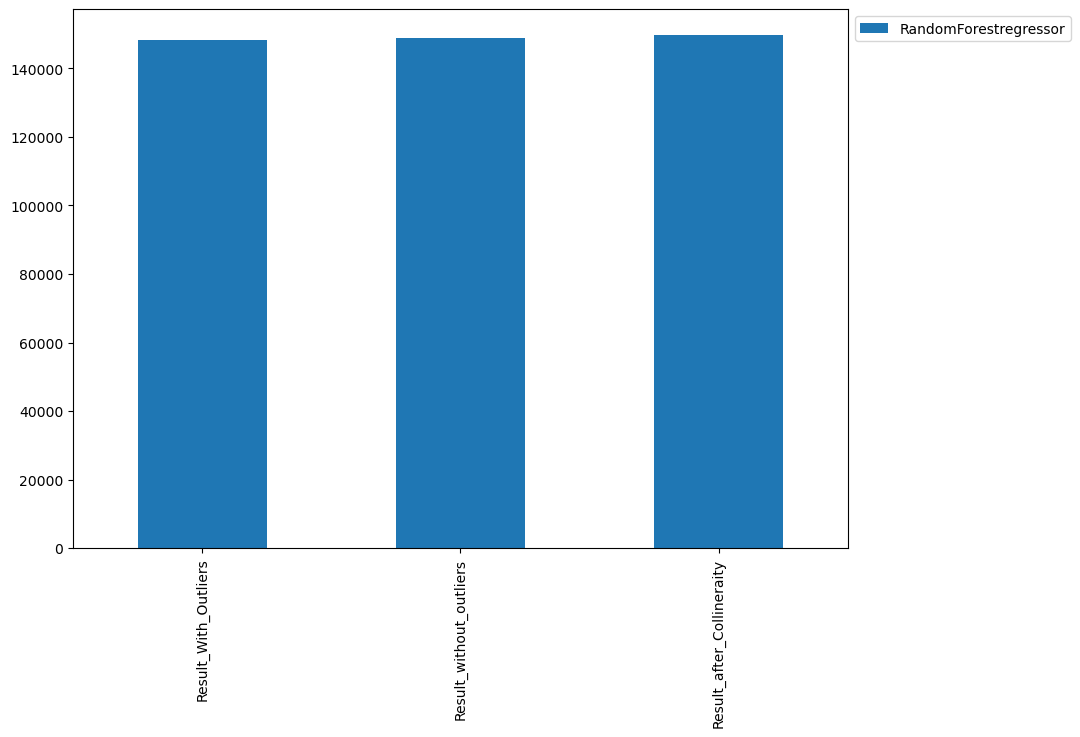

In [37]:
result_df.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));